# Random Walk

### Índice
1. [Primeiro caso de teste](#Primeiro-caso-de-teste)<br>
2. [Segundo caso de teste](#Segundo-caso-de-teste)
3. [Terceiro caso de teste](#Terceiro-caso-de-teste)

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Primeiro caso de teste

In [94]:
#função fitness
def f(x,y,z):
    return 10 * (x - 1)**2 + 20 * (y - 2)**2 + 30 * (z - 3)**2

def criaPop(tamanho,dim):
    return np.random.uniform(0 , 1 , size = (tamanho,dim))

def converter1(pop):
    lb = [-3,-2,0]
    ub = [3,4,6]
    x = lb[0]+(ub[0]-lb[0])*pop[:,:1]
    y = lb[1]+(ub[1]-lb[1])*pop[:,1:2]
    z = lb[2]+(ub[2]-lb[2])*pop[:,2:]

    #nova população com valores convertidos
    popconv = np.append(x.reshape(-1, 1), y.reshape(-1, 1), axis=1)
    popconv = np.append(popconv, z.reshape(-1, 1), axis=1)
    return popconv

def estagnacao(fitAnt, fitAtual):
    return abs(fitAnt-fitAtual)/fitAtual


In [95]:
#população inicial (primeira geração)
n_pop = 100
dim = 3
pop=criaPop(n_pop,dim)
pop

array([[0.84954881, 0.61100822, 0.20687737],
       [0.4075714 , 0.01030644, 0.87068316],
       [0.24618503, 0.28051219, 0.36389111],
       [0.51498467, 0.33866263, 0.39687736],
       [0.96111571, 0.93610544, 0.59506065],
       [0.97122537, 0.66410109, 0.898248  ],
       [0.74819985, 0.17573406, 0.33446386],
       [0.62473543, 0.78654706, 0.55294727],
       [0.74508121, 0.4995622 , 0.9911956 ],
       [0.06639099, 0.39921422, 0.46838524],
       [0.28957474, 0.52221076, 0.92176362],
       [0.5509396 , 0.20348473, 0.26664183],
       [0.79619561, 0.97471984, 0.22331986],
       [0.25578848, 0.33070683, 0.36924601],
       [0.73888873, 0.20385254, 0.86255002],
       [0.31194687, 0.82719666, 0.66394371],
       [0.79059422, 0.08596216, 0.2218611 ],
       [0.85744929, 0.03449161, 0.23629959],
       [0.59206234, 0.96106846, 0.23911102],
       [0.37606927, 0.69867034, 0.14977042],
       [0.07935001, 0.426302  , 0.16103061],
       [0.73387617, 0.80923378, 0.99948227],
       [0.

In [96]:
#converter para as faixas do primeiro caso de teste
pop=converter1(pop)
pop

array([[ 2.09729287e+00,  1.66604934e+00,  1.24126425e+00],
       [-5.54571620e-01, -1.93816139e+00,  5.22409895e+00],
       [-1.52288980e+00, -3.16926879e-01,  2.18334666e+00],
       [ 8.99080468e-02,  3.19757796e-02,  2.38126417e+00],
       [ 2.76669425e+00,  3.61663263e+00,  3.57036389e+00],
       [ 2.82735223e+00,  1.98460652e+00,  5.38948799e+00],
       [ 1.48919908e+00, -9.45595663e-01,  2.00678317e+00],
       [ 7.48412563e-01,  2.71928235e+00,  3.31768360e+00],
       [ 1.47048725e+00,  9.97373183e-01,  5.94717361e+00],
       [-2.60165409e+00,  3.95285339e-01,  2.81031143e+00],
       [-1.26255159e+00,  1.13326459e+00,  5.53058170e+00],
       [ 3.05637593e-01, -7.79091633e-01,  1.59985100e+00],
       [ 1.77717368e+00,  3.84831906e+00,  1.33991918e+00],
       [-1.46526910e+00, -1.57590086e-02,  2.21547607e+00],
       [ 1.43333236e+00, -7.76884789e-01,  5.17530012e+00],
       [-1.12831880e+00,  2.96317999e+00,  3.98366224e+00],
       [ 1.74356532e+00, -1.48422703e+00

In [97]:
#fitness
pop = np.append(pop,(f(pop[0:,0:1],pop[0:,1:2],pop[0:,2:])).reshape(-1, 1), axis=1)
pop

array([[ 2.09729287e+00,  1.66604934e+00,  1.24126425e+00,
         1.07065521e+02],
       [-5.54571620e-01, -1.93816139e+00,  5.22409895e+00,
         4.82747716e+02],
       [-1.52288980e+00, -3.16926879e-01,  2.18334666e+00,
         1.91020413e+02],
       [ 8.99080468e-02,  3.19757796e-02,  2.38126417e+00,
         9.72300810e+01],
       [ 2.76669425e+00,  3.61663263e+00,  3.57036389e+00,
         9.32415564e+01],
       [ 2.82735223e+00,  1.98460652e+00,  5.38948799e+00,
         2.04686487e+02],
       [ 1.48919908e+00, -9.45595663e-01,  2.00678317e+00,
         2.05518224e+02],
       [ 7.48412563e-01,  2.71928235e+00,  3.31768360e+00,
         1.40079905e+01],
       [ 1.47048725e+00,  9.97373183e-01,  5.94717361e+00,
         2.82893763e+02],
       [-2.60165409e+00,  3.95285339e-01,  2.81031143e+00,
         1.82300757e+02],
       [-1.26255159e+00,  1.13326459e+00,  5.53058170e+00,
         2.58331314e+02],
       [ 3.05637593e-01, -7.79091633e-01,  1.59985100e+00,
      

In [98]:
#ordenação
pop_ord = pop[pop[0:, -1].argsort()]
pop_ord

array([[ 1.51114399e+00,  1.90921431e+00,  3.56599659e+00,
         1.23880867e+01],
       [ 1.30806037e+00,  2.39658172e+00,  2.42924168e+00,
         1.38675050e+01],
       [ 7.48412563e-01,  2.71928235e+00,  3.31768360e+00,
         1.40079905e+01],
       [ 2.01412125e+00,  1.28635887e+00,  2.74963081e+00,
         2.23506343e+01],
       [ 7.84574197e-02,  1.35190576e+00,  3.47088790e+00,
         2.35449926e+01],
       [ 3.00207381e-01,  2.29236801e+00,  3.78394016e+00,
         2.50435435e+01],
       [ 2.58953174e+00,  2.18728865e+00,  3.21688056e+00,
         2.73787676e+01],
       [ 7.77954657e-01,  1.21091280e+00,  3.74230626e+00,
         2.94767712e+01],
       [ 4.10997452e-01,  3.09772613e+00,  2.62862349e+00,
         3.17069086e+01],
       [ 8.04728999e-01,  1.44758008e+00,  2.06479582e+00,
         3.27228687e+01],
       [ 2.04833153e+00,  1.88316221e+00,  3.89427111e+00,
         3.52546361e+01],
       [ 9.17585342e-01,  8.39650230e-01,  3.55379245e+00,
      

In [99]:
#50% melhores
melhor_pop_inicial = pop_ord[0:int(n_pop/2),:]
melhor_pop_inicial

array([[ 1.51114399e+00,  1.90921431e+00,  3.56599659e+00,
         1.23880867e+01],
       [ 1.30806037e+00,  2.39658172e+00,  2.42924168e+00,
         1.38675050e+01],
       [ 7.48412563e-01,  2.71928235e+00,  3.31768360e+00,
         1.40079905e+01],
       [ 2.01412125e+00,  1.28635887e+00,  2.74963081e+00,
         2.23506343e+01],
       [ 7.84574197e-02,  1.35190576e+00,  3.47088790e+00,
         2.35449926e+01],
       [ 3.00207381e-01,  2.29236801e+00,  3.78394016e+00,
         2.50435435e+01],
       [ 2.58953174e+00,  2.18728865e+00,  3.21688056e+00,
         2.73787676e+01],
       [ 7.77954657e-01,  1.21091280e+00,  3.74230626e+00,
         2.94767712e+01],
       [ 4.10997452e-01,  3.09772613e+00,  2.62862349e+00,
         3.17069086e+01],
       [ 8.04728999e-01,  1.44758008e+00,  2.06479582e+00,
         3.27228687e+01],
       [ 2.04833153e+00,  1.88316221e+00,  3.89427111e+00,
         3.52546361e+01],
       [ 9.17585342e-01,  8.39650230e-01,  3.55379245e+00,
      

In [100]:
#contagem de população estagnada
cont = 0
delta = 0.01

In [119]:
sem_evoluir = 100
i_desejadas = 5
tabela = pd.DataFrame()

for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_pop_inicial.copy()

            #novos 50% da população
            nova_pop = criaPop(int(n_pop/2),dim)

            #converter para as faixas
            nova_pop = converter1(nova_pop)

            #fitness da nova população
            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            #reordena
            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(n_pop/2),:]

            nova_pop = criaPop(int(n_pop/2),dim)

            nova_pop = converter1(nova_pop)

            nova_pop = np.append(nova_pop,(f(nova_pop[0:,0:1],nova_pop[0:,1:2],nova_pop[0:,2:])).reshape(-1, 1), axis=1)

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhores fits da geração
            melhor_i.append(melhor_pop[0:1,-1])

            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

            if evolucao <= delta:
                cont += 1

            elif evolucao >= delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela = pd.concat([tabela, pd.DataFrame(melhor_i)], axis=1)
    #print('Número de iterações para a convergência: ',i)

#media e desvio padrao dos fits
desvioP = np.std(tabela,axis=1)
media = np.mean(tabela,axis=1)
desvioSup = media - desvioP
desvioInf = media + desvioP
tabela

,0,0,0,0,0
0,8.736475,12.388087,12.388087,12.388087,9.010091
1,8.736475,12.388087,3.286284,7.633528,4.732991
2,8.736475,12.388087,3.286284,7.633528,4.732991
3,8.736475,12.388087,3.286284,7.633528,4.732991
4,8.736475,12.388087,3.286284,7.633528,4.732991
...,...,...,...,...,...
95,0.498391,1.306687,0.144085,1.590953,0.370813
96,0.498391,1.306687,0.144085,1.590953,0.370813
97,0.498391,1.043446,0.144085,1.590953,0.370813
98,0.498391,1.043446,0.144085,1.590953,0.370813


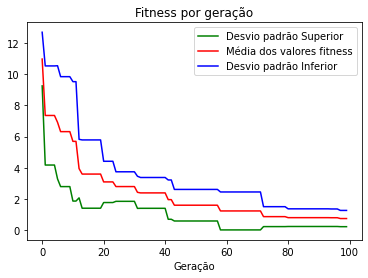

In [120]:
plt.title("Fitness por geração")
plt.xlabel("Geração")
plt.ylabel("")
plt.plot(desvioSup, color = "green", label = "Desvio padrão Superior")
plt.plot(media, color = "red", label = "Média dos valores fitness")
plt.plot(desvioInf, color = "blue", label = "Desvio padrão Inferior")
plt.legend()
plt.show()

[Início](#Índice)

## Segundo caso de teste

In [103]:
palavraAlvo = np.array([
52.547,
72.154,
53.694,
57.771,
115.88,
105.59,
75.368,
126.02,
52.756,
85.100,
80.525,
111.24,
113.62,
64.95,
89.181,
85.647,
101.71,
106.75,
110.37,
72.082,
104.38,
102.41,
63.009,
59.52,
89.869,
126.78,
77.231,
96.821,
67.905,
110.1])

In [104]:
tamanho_2 = palavraAlvo.size
dim_2 = 1

In [105]:
def converter2(palavra):
    lb = min(palavraAlvo)
    ub = max(palavraAlvo)
    novaPalavra =[]
    for i in palavra:
        novaPalavra=np.append(novaPalavra,lb + (ub - lb) * i)
    return novaPalavra

#Funcao fitness
def diferenca(p1,p2):
    diferenca = np.array([])
    for i,j in zip(p1,p2):
        diferenca=np.append(diferenca,((i - j)**2))
    return diferenca

In [106]:
#palavra aleatoria (ja convertida para os limites da palavra alvo)
palavra = [converter2(criaPop(tamanho_2,dim_2))]
palavra

[array([107.91225974,  64.34387093, 106.15703738, 119.2714703 ,
         77.6240688 ,  55.89216174, 126.27645222,  90.40966958,
        119.68499862, 109.02729588,  63.66047621, 121.25635877,
         72.4675748 , 124.09956307, 125.29743962,  76.53076663,
         71.90212663,  72.30999193,  68.26504714,  99.80903763,
         58.49250272,  88.79493004, 108.47213525,  54.46548296,
         58.16829628, 103.72103723,  66.96626059,  55.01058323,
         97.94080186, 108.75250328])]

In [107]:
#palavra + fitness
palavra.append(diferenca(palavraAlvo,palavra))
palavra = np.array(palavra).T
palavra

array([[1.07912260e+02, 3.06531199e+03],
       [6.43438709e+01, 1.39166164e+02],
       [1.06157037e+02, 2.87403611e+03],
       [1.19271470e+02, 4.45215494e+03],
       [7.76240688e+01, 6.28859380e+02],
       [5.58921617e+01, 1.11901071e+01],
       [1.26276452e+02, 5.43603212e+03],
       [9.04096696e+01, 1.43358175e+03],
       [1.19684999e+02, 4.50751086e+03],
       [1.09027296e+02, 3.19002382e+03],
       [6.36604762e+01, 1.23509353e+02],
       [1.21256359e+02, 4.72097598e+03],
       [7.24675748e+01, 3.96829300e+02],
       [1.24099563e+02, 5.11976928e+03],
       [1.25297440e+02, 5.29262646e+03],
       [7.65307666e+01, 5.75221062e+02],
       [7.19021266e+01, 3.74620927e+02],
       [7.23099919e+01, 3.90575850e+02],
       [6.82650471e+01, 2.47057006e+02],
       [9.98090376e+01, 2.23370020e+03],
       [5.84925027e+01, 3.53490026e+01],
       [8.87949300e+01, 1.31391243e+03],
       [1.08472135e+02, 3.12762075e+03],
       [5.44654830e+01, 3.68057687e+00],
       [5.816829

In [108]:
#ordenar
palavra_ord = palavra[palavra[0:, -1].argsort()]
#50% melhores
melhor_palavra_inicial = palavra_ord[0:int(tamanho_2/2),:]
melhor_palavra_inicial

array([[  54.46548296,    3.68057687],
       [  55.01058323,    6.06924235],
       [  55.89216174,   11.19010709],
       [  58.16829628,   31.59897191],
       [  58.49250272,   35.34900263],
       [  63.66047621,  123.50935345],
       [  64.34387093,  139.16616368],
       [  66.96626059,  207.91507582],
       [  68.26504714,  247.05700603],
       [  71.90212663,  374.62092698],
       [  72.30999193,  390.57585007],
       [  72.4675748 ,  396.82930039],
       [  76.53076663,  575.22106174],
       [  77.6240688 ,  628.85937957],
       [  88.79493004, 1313.9124323 ]])

In [109]:
#contagem de geração estagnada
cont = 0
delta = 0.01
sem_evoluir = 100
i_desejadas = 5

In [110]:
#funcao random walk
#parametros: melhor_pop_inicial, n_pop, dim, converter, funcao fitness, tabela
#problema: funcao fitness

In [115]:
tabela2 = pd.DataFrame()
for j in range(i_desejadas):

    melhor_i=[]

    for i in range(sem_evoluir):
        #segunda geracao
        if i==0:
            nova_melhor_pop = melhor_palavra_inicial.copy() #troca melhor_pop_inicial

            #novos 50% da população
            nova_pop = criaPop(int(tamanho_2/2),dim_2) #troca n_pop, dim

            #converter para as faixas
            nova_pop = converter2(nova_pop) #troca converter1

            #fitness da nova população
            nova_pop = np.c_[nova_pop,(diferenca(palavraAlvo,nova_pop))] #troca f

            #melhor 50% pop anterior + 50% nova população
            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            #reordena
            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()] 

            #melhor fit dessa geração
            melhor_i.append(melhor_pop[0:1,-1])
            
        #gerações posteriores
        elif i>0:
            nova_melhor_pop = melhor_pop[0:int(tamanho_2/2),:]

            nova_pop = criaPop(int(tamanho_2/2),dim_2) #troca n_pop, dim

            nova_pop = converter2(nova_pop) #troca converter1

            nova_pop = np.c_[nova_pop,(diferenca(palavraAlvo,nova_pop))] #troca f

            nova_melhor_pop = np.append(nova_melhor_pop,(nova_pop),axis= 0)

            melhor_pop = nova_melhor_pop[nova_melhor_pop[0:, -1].argsort()]

            #melhores fits da geração
            melhor_i.append(melhor_pop[0:1,-1])

            evolucao = estagnacao(melhor_i[i-1],melhor_i[i])

            if evolucao <= delta:
                cont += 1

            elif evolucao >= delta:
                cont=0

            elif sem_evoluir == cont:
                continue

    tabela2 = pd.concat([tabela2, pd.DataFrame(melhor_i)], axis=1) #troca tabela
    #print('Número de iterações para a convergência: ',i)

#media e desvio padrao dos fits
desvioP = np.std(tabela2,axis=1)
media = np.mean(tabela2,axis=1)
desvioSup = media - desvioP
desvioInf = media + desvioP


tabela2

,0,0,0,0,0
0,0.900584,0.645041,1.128097,0.736172,2.080145
1,0.210182,0.403376,1.128097,0.736172,2.080145
2,0.210182,0.403376,1.128097,0.079128,1.233613
3,0.180510,0.403376,1.089659,0.079128,1.233613
4,0.180510,0.403376,0.249111,0.079128,1.233613
...,...,...,...,...,...
95,0.000104,0.000059,0.000130,0.000777,0.014885
96,0.000104,0.000059,0.000130,0.000777,0.014885
97,0.000104,0.000059,0.000130,0.000777,0.014885
98,0.000104,0.000059,0.000130,0.000777,0.014885


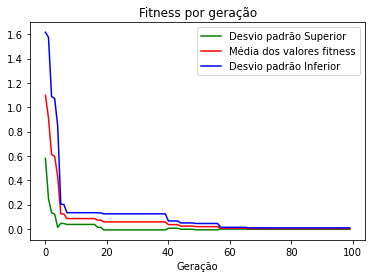

In [116]:
plt.title("Fitness por geração")
plt.xlabel("Geração")
plt.ylabel("")
plt.plot(desvioSup, color = "green", label = "Desvio padrão Superior")
plt.plot(media, color = "red", label = "Média dos valores fitness")
plt.plot(desvioInf, color = "blue", label = "Desvio padrão Inferior")
plt.legend()
plt.show()

[Início](#Índice)<br>

## Terceiro caso de teste

In [113]:
#função rastrigin
def rastrigin(x):
    return 10 * len(x) + sum(i * i - 10 * cos(2 * pi * i) for i in x)